# What is the most optimal skills to learn for Data Scientists?

## Methodology
### 1. group skills to determine median salary and likelihood of being in posting
### 2. Visualize median salary vs percent skill demand 
### 3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

In [3]:
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

df_DS_US_exploded = df_DS_US.explode('job_skills')

df_DS_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
116,114000.0,r


In [12]:
df_DS_skills = df_DS_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DS_job_count = len(df_DS_US)

df_DS_skills['skill_percent'] = df_DS_skills['skill_count'] / DS_job_count * 100

skill_percent = 7

df_DS_skills_high_demand = df_DS_skills[df_DS_skills['skill_percent'] > skill_percent]

df_DS_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,3358,131867.0,73.753569
sql,2463,134500.0,54.096200
r,2053,126000.0,45.091149
sas,1022,120000.0,22.446738
tableau,989,125000.0,21.721942
aws,768,134000.0,16.867999
spark,718,135959.5,15.769822
excel,490,124290.0,10.762135
tensorflow,474,149646.0,10.410718


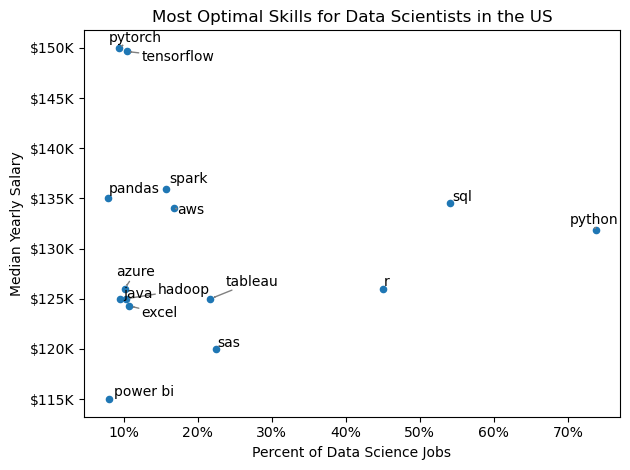

In [18]:
from adjustText import adjust_text

df_DS_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], txt))


# adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Science Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Scientists in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

In [19]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) #convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value to existing dict
            technology_dict[key] += value
        else: # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value


# remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['outlook',
  'ssis',
  'qlik',
  'looker',
  'alteryx',
  'sap',
  'microstrategy',
  'dax',
  'msaccess',
  'powerpoint',
  'visio',
  'spss',
  'tableau',
  'powerbi',
  'splunk',
  'ssrs',
  'power bi',
  'word',
  'esquisse',
  'sas',
  'ms access',
  'cognos',
  'sheets',
  'nuix',
  'datarobot',
  'sharepoint',
  'excel',
  'spreadsheet'],
 'programming': ['dart',
  'elixir',
  'vba',
  'c',
  'visual basic',
  'c++',
  'c#',
  'haskell',
  'sql',
  'kotlin',
  'solidity',
  'swift',
  'css',
  'clojure',
  'php',
  'ocaml',
  'erlang',
  'nosql',
  'groovy',
  'mongodb',
  'powershell',
  'bash',
  'typescript',
  'rust',
  'ruby',
  'vb.net',
  'python',
  'fortran',
  'html',
  'lua',
  'crystal',
  'delphi',
  'cobol',
  'scala',
  'r',
  'shell',
  'go',
  'sass',
  'golang',
  'assembly',
  't-sql',
  'objective-c',
  'matlab',
  'pascal',
  'sas',
  'mongo',
  'julia',
  'apl',
  'java',
  'perl',
  'lisp',
  'no-sql',
  'visualbasic',
  'f#',
  'javascr

In [24]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,ssis
0,analyst_tools,qlik
0,analyst_tools,looker
0,analyst_tools,alteryx
...,...,...
9,sync,wire
9,sync,ringcentral
9,sync,symphony
9,sync,zoom


In [26]:
df_plot = df_DS_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

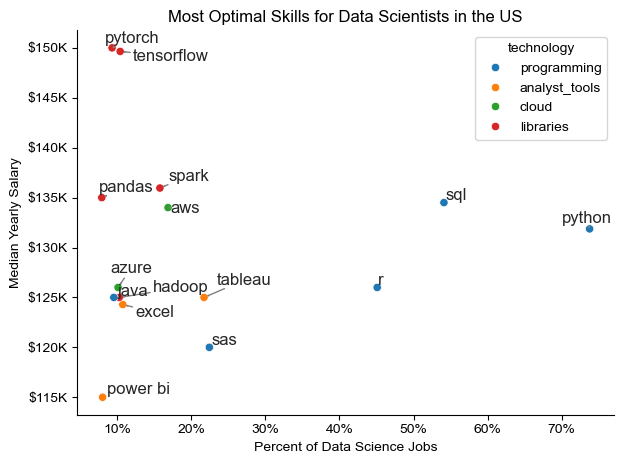

In [30]:
from adjustText import adjust_text

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

# prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], txt))


# adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Science Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Scientists in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()